# 📊 Bank Marketing Dataset — Data Cleaning & Preprocessing Notebook

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder


# Load dataset
file_path = r'D:\SEM7\BA\Project\bank+marketing\bank\bank-full.csv'  # Ensure the file is in the same folder as this notebook
df = pd.read_csv(file_path, sep=';')

# Display basic info
print("Shape:", df.shape)
display(df.head())
df.info()


Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 🧼 Data Cleaning

In [34]:

# Replace 'unknown' with 'Unknown' (keep as a separate category)
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
df[categorical_cols] = df[categorical_cols].replace('unknown', 'Unknown')

# Convert binary columns to 0/1
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Handle 'pdays': convert -1 to a special category (e.g., "Not_contacted")
# df['pdays'] = df['pdays'].replace(-1, np.nan)  # or leave numeric if preferred

# Check missing values
print("\nMissing Values Summary:")
print(df.isna().sum())

# Data types check
df.info()



Missing Values Summary:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays   

## 📊 Data Summary & Visualization

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000



Column: job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Unknown           288
Name: count, dtype: int64

Column: marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Column: education
education
secondary    23202
tertiary     13301
primary       6851
Unknown       1857
Name: count, dtype: int64

Column: contact
contact
cellular     29285
Unknown      13020
telephone     2906
Name: count, dtype: int64

Column: poutcome
poutcome
Unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


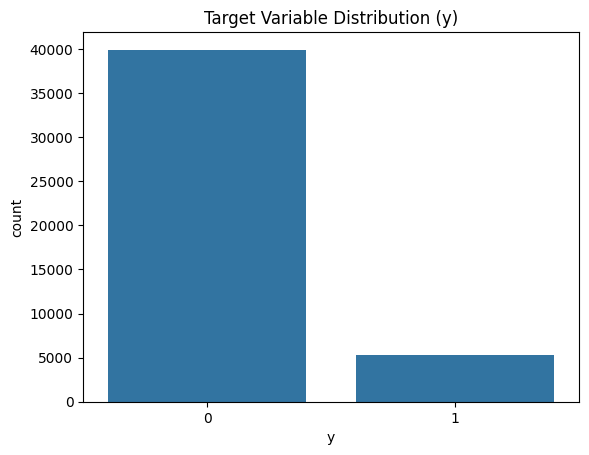

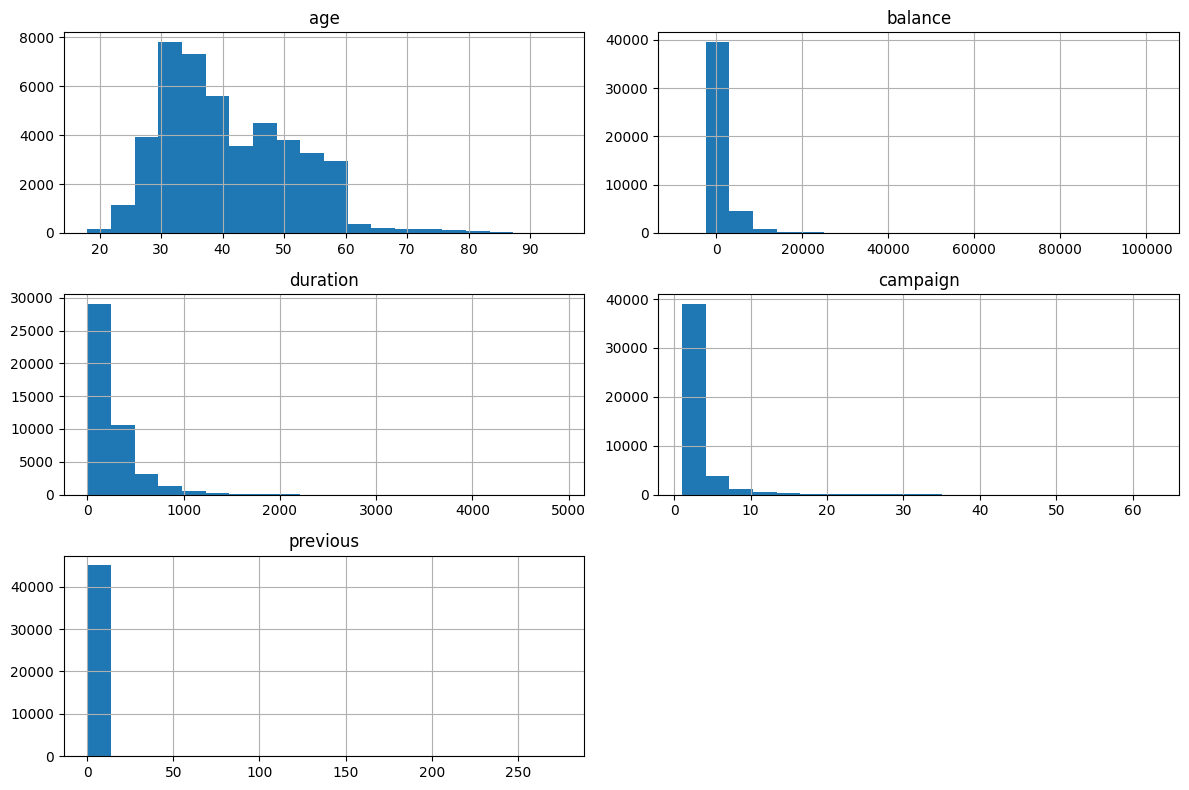

In [35]:

# Descriptive statistics for numeric columns
display(df.describe())

# Value counts for categorical variables
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Target variable distribution
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution (y)')
plt.show()

# Example histograms for numeric columns
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous']
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


In [36]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3776,40,blue-collar,married,secondary,0,580,1,0,Unknown,16,may,192,1,-1,0,Unknown,0
9928,47,services,single,secondary,0,3644,0,0,Unknown,9,jun,83,2,-1,0,Unknown,0
33409,25,student,single,tertiary,0,538,1,0,cellular,20,apr,226,1,-1,0,Unknown,0
31885,42,management,married,tertiary,0,1773,0,0,cellular,9,apr,311,1,336,1,failure,0
15738,56,management,married,tertiary,0,217,0,1,cellular,21,jul,121,2,-1,0,Unknown,0
30813,28,blue-collar,married,secondary,0,1134,0,0,cellular,9,feb,130,3,-1,0,Unknown,0
35463,24,management,single,tertiary,0,1085,0,1,cellular,7,may,95,6,-1,0,Unknown,0
31382,37,admin.,single,secondary,0,127,0,0,cellular,23,mar,83,4,-1,0,Unknown,0
16904,30,blue-collar,single,secondary,0,3,1,0,cellular,25,jul,51,1,-1,0,Unknown,0
11930,38,technician,single,secondary,0,258,0,1,Unknown,20,jun,587,2,-1,0,Unknown,0


## 🧠 Prepare Dataset for Machine Learning

In [37]:
categorical_columns = [
    'job', 'marital', 'education', 'contact', 'month', 'poutcome'
]

In [38]:
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [39]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9777,39,5,1,1,0,1873,0,0,0,9,6,161,2,-1,0,0,0
39006,32,10,2,2,0,55,1,0,1,18,8,185,1,-1,0,0,0
17239,48,10,1,2,0,759,1,0,1,28,5,84,5,-1,0,0,0
34008,29,5,1,3,0,125,0,0,1,30,0,130,2,-1,0,0,0
5724,37,1,1,2,0,-255,1,0,0,26,8,96,2,-1,0,0,0
7478,58,10,1,2,0,4299,1,0,0,29,8,348,3,-1,0,0,0
40482,67,5,1,3,0,694,0,0,1,7,5,250,1,-1,0,0,0
20594,33,5,1,3,0,1071,0,0,1,12,1,83,4,-1,0,0,0
4137,27,5,2,3,1,0,1,0,0,19,8,352,1,-1,0,0,0
28435,26,2,2,1,0,155,1,0,1,29,4,291,1,244,4,1,0


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 2: Assume you already have df loaded
# X is the feature (independent variable), y is the target (dependent variable)
X = df.iloc[:, :-1].to_numpy()  # Features (all columns except the last)
y = df.iloc[:, -1].to_numpy()   # Target (last column)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plotting (optional, to visualize the decision boundary for 2D features)
if X_train.shape[1] == 2:  # Only works for 2 features
    plt.figure(figsize=(10, 6))
    
    # Create a mesh grid to plot the decision boundary
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Accuracy: 0.8854
Precision: 0.5741
Recall: 0.1952
F1 Score: 0.2914
Confusion Matrix:
[[7794  158]
 [ 878  213]]


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


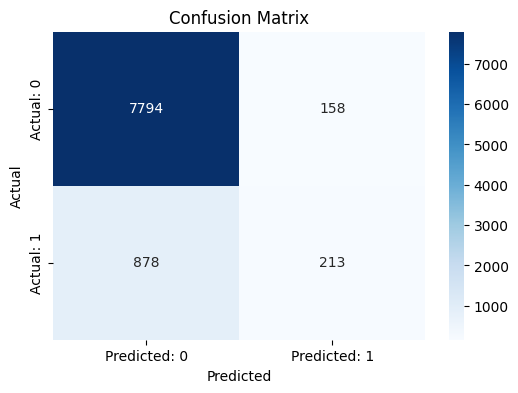

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


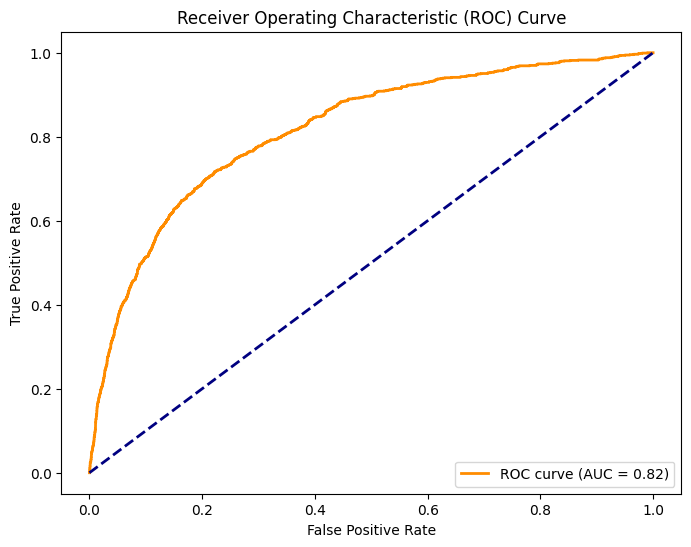

In [42]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [43]:
df.iloc[:2]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,1,3,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,10,2,2,0,29,1,0,0,5,8,151,1,-1,0,0,0


In [44]:
X.shape

(45211, 16)

In [45]:
y.shape

(45211,)

# ML Training'

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBClassifier, plot_importance



In [46]:
X = df.drop("y", axis=1)
y = df["y"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
GNBAcc = accuracy_score(pred, y_test)
GNBAcc

0.8501603450182461

In [60]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
logRegAcc = accuracy_score(pred, y_test)
logRegAcc

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.884662169633971

In [62]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
DTCAcc = accuracy_score(pred, y_test)
DTCAcc

0.8677430056397213

In [63]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
RFCAcc = accuracy_score(pred, y_test)
RFCAcc

0.900364923144974

In [64]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
XGBCAcc = accuracy_score(pred, y_test)
XGBCAcc

0.8974897710936636

In [58]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
Accuracy: 0.8979912115505336

Accuracy: 0.899922592060157
Precision: 0.5891647855530474
Recall: 0.49106302916274697
F1: 0.5356593124679323
Area under precision (AUC) Recall: 0.34914232349119695


In [65]:
model_accuracy = {
    'GaussianNB': GNBAcc,
    'Logistic Regression': logRegAcc,
    'Decision Tree': DTCAcc,
    'Random Forest': RFCAcc,
    'XGBoost': XGBCAcc
}

C:\Users\user\AppData\Local\Temp\ipykernel_22940\2667777644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()), palette="Blues_d")


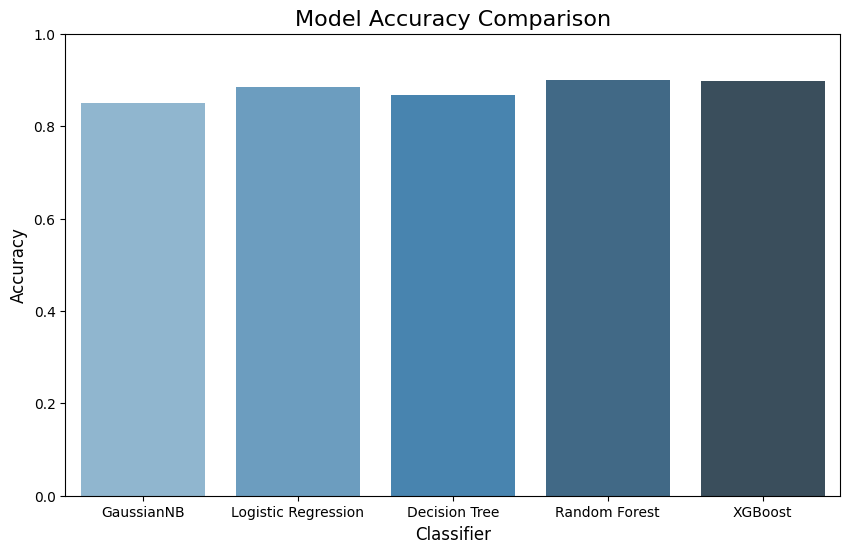

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()), palette="Blues_d")
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()

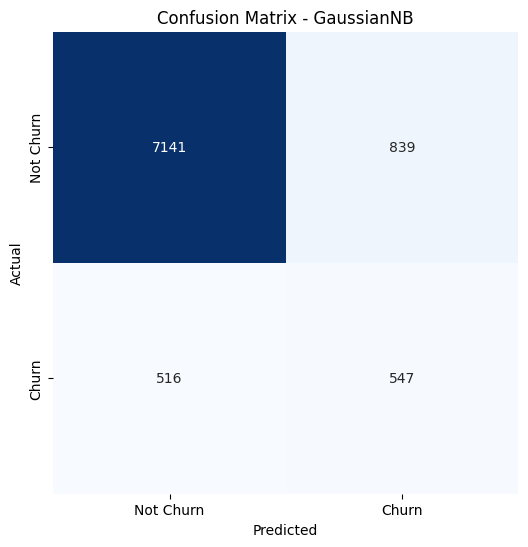

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


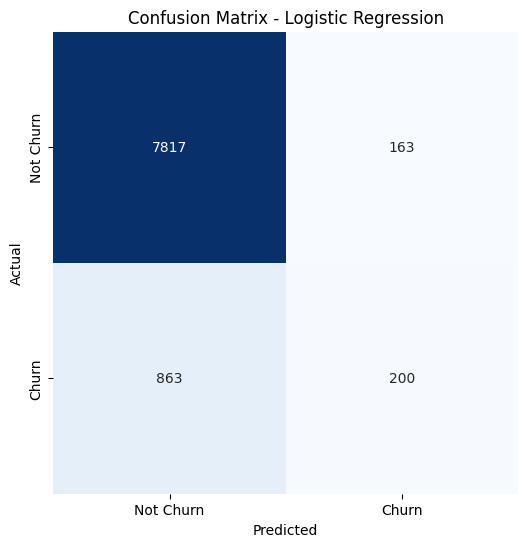

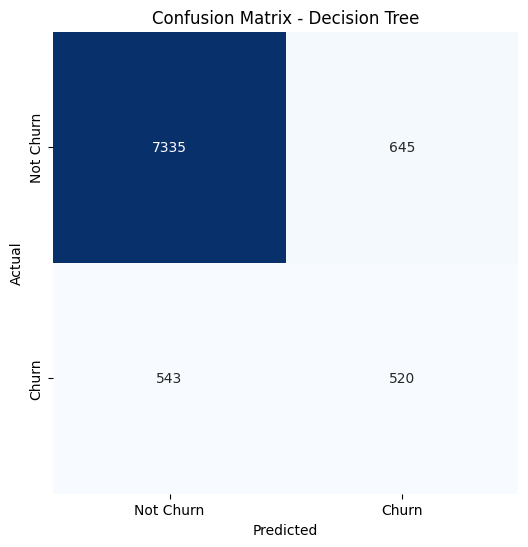

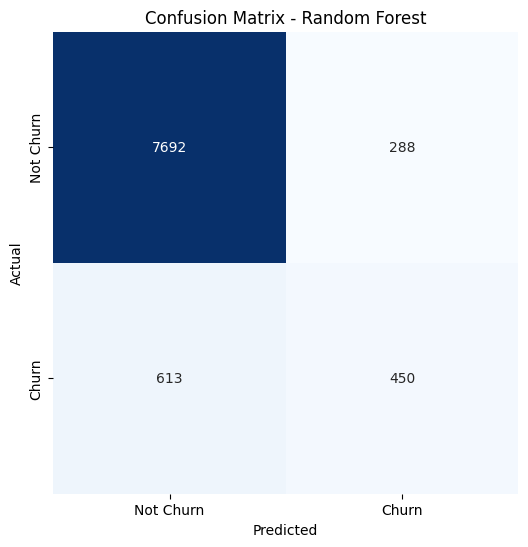

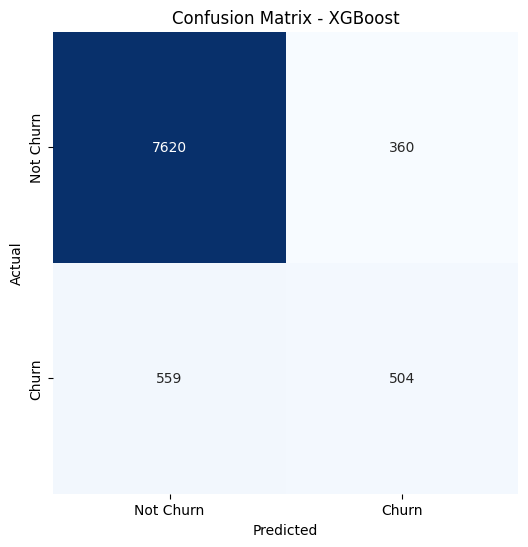

In [67]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
models = [GaussianNB(), LogisticRegression(max_iter=200), tree.DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(n_estimators=200, random_state=200), XGBClassifier(max_depth=10, random_state=10, n_estimators=220, eval_metric='auc')]

model_names = ['GaussianNB', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, name)


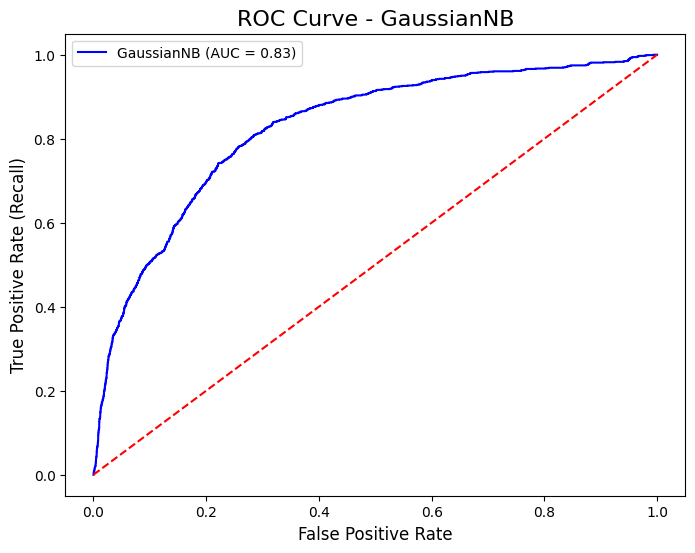

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


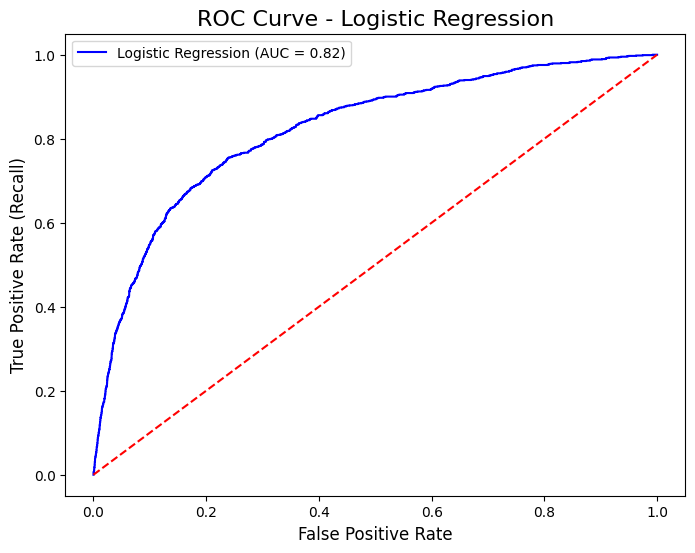

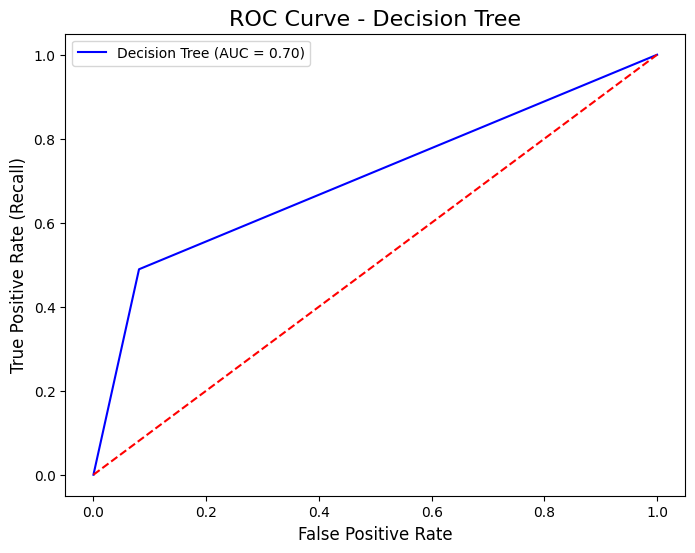

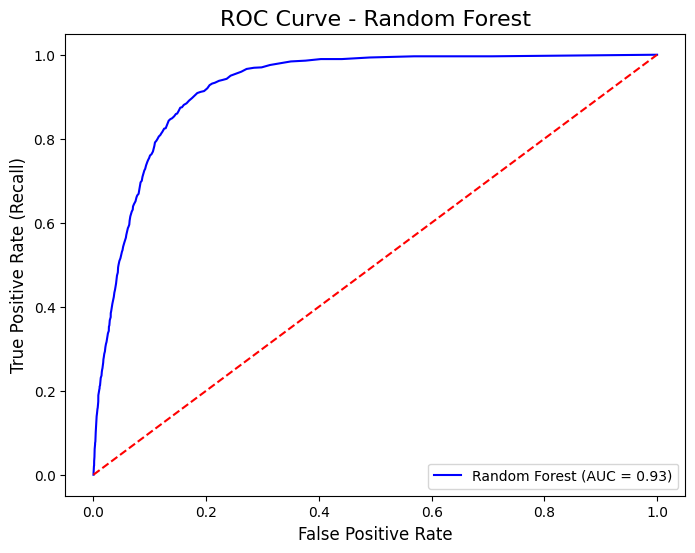

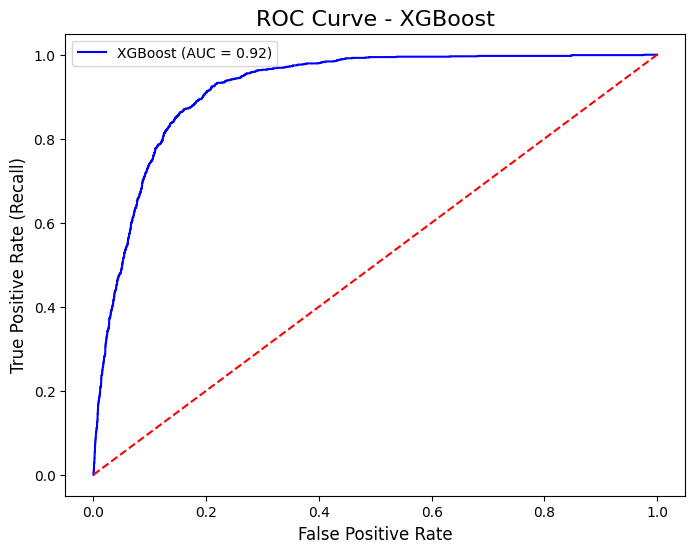

In [68]:
def plot_roc_curve(model, X_test, y_test, model_name):
    pred_prob = model.predict_proba(X_test)[:,1]  # Get probabilities for positive class
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc_score(y_test, pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random model (AUC = 0.5)
    plt.title(f'ROC Curve - {model_name}', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.legend()
    plt.show()

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test, name)


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

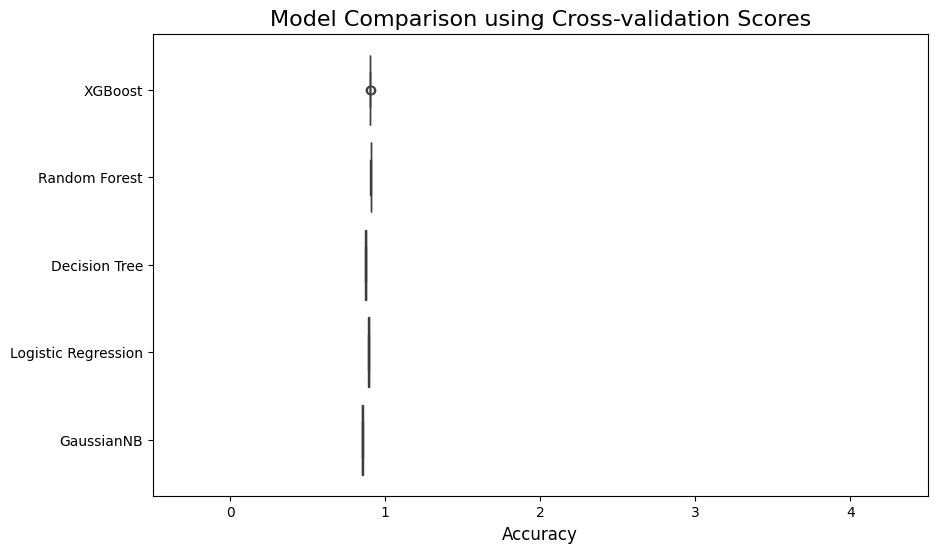

In [69]:
# If you use cross-validation for better model comparison, you could plot a boxplot.
from sklearn.model_selection import cross_val_score

model_names = ['GaussianNB', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
models = [GaussianNB(), LogisticRegression(max_iter=200), tree.DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(n_estimators=200, random_state=200), XGBClassifier(max_depth=10, random_state=10, n_estimators=220, eval_metric='auc')]

cv_scores = []

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

# Plotting the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=cv_scores, vert=False)
plt.yticks(np.arange(len(model_names)), model_names)
plt.title('Model Comparison using Cross-validation Scores', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.show()


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

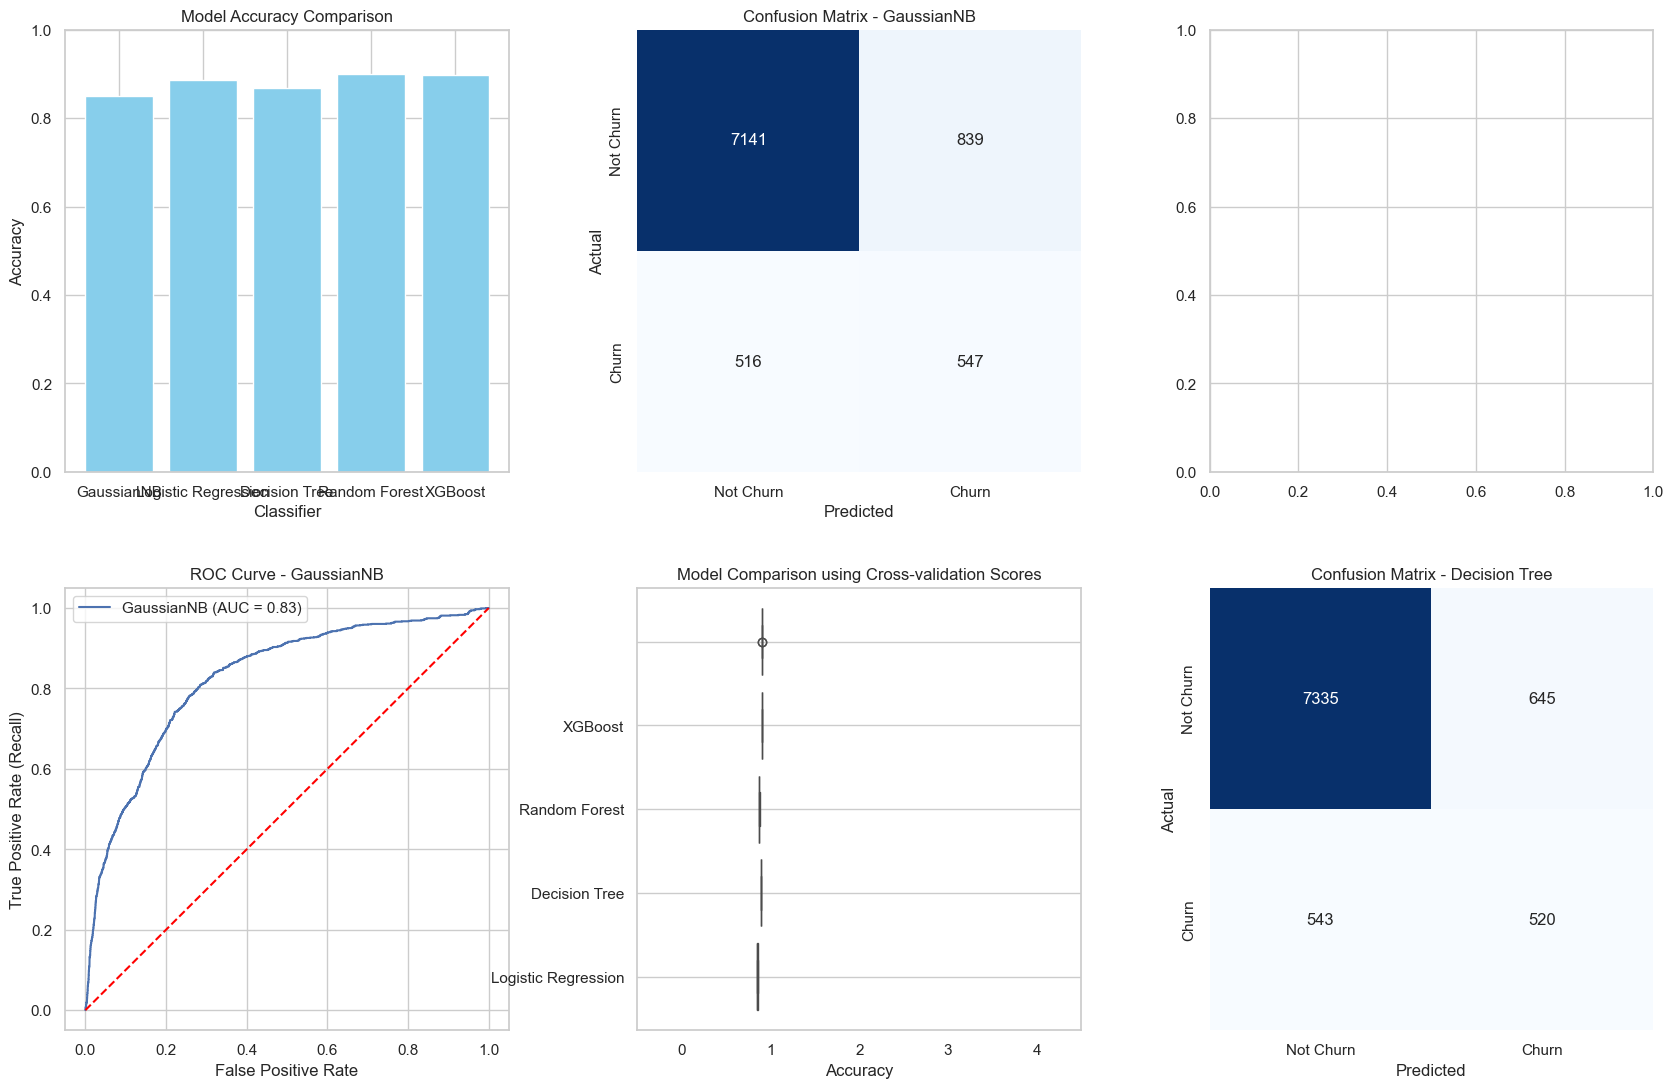

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Set plot style
sns.set(style="whitegrid")

# Train-test split (assumed)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = [
    GaussianNB(),
    LogisticRegression(max_iter=200),
    tree.DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200, random_state=200),
    XGBClassifier(max_depth=10, random_state=10, n_estimators=220, eval_metric='auc')
]

# Define model names for easy reference
model_names = ['GaussianNB', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Fit all models first
for model in models:
    model.fit(X_train, y_train)

# Now make predictions for each model
predictions = [model.predict(X_test) for model in models]
probabilities = [model.predict_proba(X_test)[:, 1] for model in models]

# Calculate accuracy scores
accuracy_scores = [accuracy_score(y_test, pred) for pred in predictions]

# Store the accuracy results in a dictionary
model_accuracy = dict(zip(model_names, accuracy_scores))

# Plotting in subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 grid for subplots
fig.tight_layout(pad=5.0)  # To avoid overlap of titles and labels

# --- Accuracy Comparison Bar Plot ---
axs[0, 0].bar(model_accuracy.keys(), model_accuracy.values(), color='skyblue')
axs[0, 0].set_title('Model Accuracy Comparison')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 1)

# --- Confusion Matrix (example for one model: GaussianNB) ---
def plot_confusion_matrix(model, X_test, y_test, model_name, ax):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Plot confusion matrix for one model in the top-right subplot
plot_confusion_matrix(models[0], X_test, y_test, model_names[0], axs[0, 1])

# --- ROC Curve (example for one model: GaussianNB) ---
def plot_roc_curve(model, X_test, y_test, model_name, ax):
    pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, pred_prob):.2f})')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random model (AUC = 0.5)
    ax.set_title(f'ROC Curve - {model_name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate (Recall)')
    ax.legend()

# Plot ROC curve for one model in the bottom-left subplot
plot_roc_curve(models[0], X_test, y_test, model_names[0], axs[1, 0])

# --- Boxplot for cross-validation (model performance comparison) ---
from sklearn.model_selection import cross_val_score

cv_scores = []

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

sns.boxplot(data=cv_scores, ax=axs[1, 1], vert=False)
axs[1, 1].set_yticklabels(model_names)
axs[1, 1].set_title('Model Comparison using Cross-validation Scores')
axs[1, 1].set_xlabel('Accuracy')

# --- Additional subplot (if you want to visualize other models, like Decision Tree's confusion matrix) ---
# Example for Decision Tree confusion matrix in the last subplot
plot_confusion_matrix(models[2], X_test, y_test, model_names[2], axs[1, 2])

plt.show()


## Models Training 

In [85]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')
print("Original df shape:", df.shape)

# List categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'poutcome', 'month']  # include 'month'

# Encode all categorical columns in the original dataframe
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # Save encoder if needed for later
    joblib.dump(le, f"{col}_encoder.pkl")

print("Categorical columns encoded. Sample:")
print(df.head())


Original df shape: (45211, 17)
Categorical columns encoded. Sample:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome   y  
0    5      8       261         1     -1         0         3  no  
1    5      8       151         1     -1         0         3  no  
2    5      8        76         1     -1         0         3  no  
3    5      8        92         1     -1         0         3  no  
4    5      8       198         1     -1         0         3  no  


In [86]:
# Select features and target
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 
            'housing', 'loan', 'contact', 'day', 'month', 'duration', 
            'campaign', 'pdays', 'previous', 'poutcome']

X = df[features]
y = df['y']  # Already 0/1

# Numeric columns to scale for SVM
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

print("Train/Test shapes:", X_train.shape, X_test.shape)


Train/Test shapes: (36168, 16) (9043, 16)


C:\Users\user\AppData\Local\Temp\ipykernel_22940\1351976651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


In [81]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [96]:
import pandas as pd

# Correct separator for bank-full.csv
df = pd.read_csv("bank-full.csv", sep=';')

print(df.head())
print(df.columns)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

In [97]:
print("Number of missing values in y:", df['y'].isna().sum())


Number of missing values in y: 0


In [98]:
# Convert y to numeric for models that require it
y_numeric = df['y'].map({'no':0, 'yes':1})

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'poutcome', 'month']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [99]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')
print("Dataset loaded. Shape:", df.shape)
print(df.head())

# Convert target to numeric
df['y_numeric'] = df['y'].map({'no':0, 'yes':1})

# Categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'poutcome', 'month']

# Encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # Save encoder for later
    joblib.dump(le, f"{col}_encoder.pkl")

# Numeric columns to scale
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
joblib.dump(scaler, "scaler.pkl")

# Features and target
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 
            'housing', 'loan', 'contact', 'day', 'month', 'duration', 
            'campaign', 'pdays', 'previous', 'poutcome']
X = df[features]
y = df['y_numeric']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train/Test shapes:", X_train.shape, X_test.shape)


Dataset loaded. Shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Train/Test shapes: (36168, 16) (9043, 16)


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Save model
joblib.dump(rf_model, "rf_model.pkl")


Random Forest Accuracy: 0.9058940617051864
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.41      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



['rf_model.pkl']

### XGBoost

In [101]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

joblib.dump(xgb_model, "xgb_model.pkl")


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:24:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9067787238748203
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.48      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



['xgb_model.pkl']

### SVM 

In [102]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

joblib.dump(svm_model, "svm_model.pkl")


SVM Accuracy: 0.8920712153046555
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.65      0.17      0.27      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



['svm_model.pkl']

### LightGBM

In [103]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=200, random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

joblib.dump(lgb_model, "lgb_model.pkl")


[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in

LightGBM Accuracy: 0.9063363927900033
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.64      0.47      0.54      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.90      0.91      0.90      9043



['lgb_model.pkl']

### CatBoost

In [ ]:
from catboost import CatBoostClassifier

# Indices of categorical columns
cat_indices = [X.columns.get_loc(c) for c in cat_cols]

cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, verbose=100, random_state=42)
cat_model.fit(X_train, y_train, cat_features=cat_indices)

y_pred_cat = cat_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

joblib.dump(cat_model, "cat_model.pkl")


### Cat Boost

In [104]:
from catboost import CatBoostClassifier

# Indices of categorical columns
cat_indices = [X.columns.get_loc(c) for c in cat_cols]

cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, verbose=100, random_state=42)
cat_model.fit(X_train, y_train, cat_features=cat_indices)

y_pred_cat = cat_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

joblib.dump(cat_model, "cat_model.pkl")


0:	learn: 0.6311969	total: 256ms	remaining: 2m 7s
100:	learn: 0.2010758	total: 9.17s	remaining: 36.2s
200:	learn: 0.1897740	total: 18.2s	remaining: 27.1s
300:	learn: 0.1817405	total: 27s	remaining: 17.8s
400:	learn: 0.1757289	total: 35.7s	remaining: 8.82s
499:	learn: 0.1711954	total: 44.4s	remaining: 0us
CatBoost Accuracy: 0.9099856242397435
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.48      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



['cat_model.pkl']

In [105]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('rf', rf_model),
                ('xgb', xgb_model),
                ('svm', svm_model),
                ('lgb', lgb_model),
                ('cat', cat_model)],
    voting='soft'
)

ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

joblib.dump(ensemble, "ensemble_model.pkl")


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:29:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327
0:	learn: 0.6369690	total: 8.95ms	remaining: 4.46s
100:	learn: 0.2054936	total: 857ms	remaining: 3.38s
200:	learn: 0.1902877	total: 1.68s	remaining: 2.5s
300:	learn: 0.1795791	total: 2.51s	remaining: 1.66s
400:	learn: 0.1710506	total: 3.31s	remaining: 818ms
499:	learn: 0.1645273	total: 4.11s	remaining: 0us
Ensemble Accuracy: 0.910206789782152
              precision    recall  f1-score   support

           0       0.93      0.97      0.95 

['ensemble_model.pkl']

In [107]:
def predict_new(data_dict):
    """
    data_dict: dictionary of features with same keys as 'features'
    returns: predicted class 0/1 and probability of 1
    """
    import pandas as pd
    import joblib
    
    # Categorical and numeric columns from training
    cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
                'loan', 'contact', 'poutcome', 'month']
    num_cols = ['age','balance','day','duration','campaign','pdays','previous']
    
    df_input = pd.DataFrame([data_dict])
    
    # Encode categorical columns using saved LabelEncoders
    for col in cat_cols:
        le = joblib.load(f"{col}_encoder.pkl")
        df_input[col] = le.transform(df_input[col])
    
    # Scale numeric columns
    scaler = joblib.load("scaler.pkl")
    df_input[num_cols] = scaler.transform(df_input[num_cols])
    
    # Load ensemble model
    ensemble = joblib.load("ensemble_model.pkl")
    
    pred = ensemble.predict(df_input)
    proba = ensemble.predict_proba(df_input)[:,1]
    
    return int(pred[0]), float(proba[0])


In [108]:
new_customer = {
    'age':35, 'job':'technician', 'marital':'married', 'education':'secondary',
    'default':'no', 'balance':1500, 'housing':'yes', 'loan':'no', 'contact':'cellular',
    'day':15, 'month':'may', 'duration':200, 'campaign':2, 'pdays':-1,
    'previous':0, 'poutcome':'unknown'
}

predict_new(new_customer)


(0, 0.02277264940705632)

In [120]:
new_customer_yes = {
    'age': 32,
    'job': 'blue-collar',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 136,
    'housing': 'no',
    'loan': 'no',
    'contact': 'cellular',
    'day': 16,
    'month': 'nov',
    'duration': 206,
    'campaign': 1,
    'pdays': 188,
    'previous': 3,
    'poutcome': 'success'
}

predict_new(new_customer_yes)


(1, 0.6125488988860515)

In [119]:
import joblib
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']  # include "month" if encoded

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Re-encode on full df
    label_encoders[col] = le

# ✅ Save all encoders into one file
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Label encoders saved as label_encoders.pkl")


✅ Label encoders saved as label_encoders.pkl


In [121]:
new_customer = {
    'age': 38,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 10596,
    'housing': 'no',
    'loan': 'no',
    'contact': 'cellular',
    'day': 19,
    'month': 'aug',
    'duration': 195,
    'campaign': 1,
    'pdays': 197,
    'previous': 4,
    'poutcome': 'other'
}

# Make prediction
pred_class, pred_proba = predict_new(new_customer)
print("Predicted Class (0/1):", pred_class)
print("Predicted Probability of YES:", round(pred_proba, 3))


Predicted Class (0/1): 1
Predicted Probability of YES: 0.577
